In [1]:
# Chargement des données
import os
import pandas as pd
import numpy as np
os.getcwd() 

'C:\\Users\\miras\\OneDrive\\Documents\\GitHub\\Bookmarkerspy'

In [2]:
ls

 Le volume dans le lecteur C s’appelle Windows-SSD
 Le numéro de série du volume est 6ECF-2E04

 Répertoire de C:\Users\miras\OneDrive\Documents\GitHub\Bookmarkerspy

29/11/2021  00:18    <DIR>          .
17/09/2021  18:08    <DIR>          ..
24/10/2021  22:41                48 .gitignore
24/10/2021  16:41    <DIR>          .ipynb_checkpoints
24/10/2021  18:45           102 655 audit_donnees.xlsx
28/11/2021  15:52         1 496 973 dataset_moyennes_matchs.csv
17/09/2021  18:08           719 827 DataViz.ipynb
28/11/2021  15:52           745 643 df_stats_cotes.csv
17/09/2021  18:08             1 099 LICENSE
29/11/2021  00:18           663 878 Predictive_Models.ipynb
24/10/2021  16:41           165 297 Preprocessing.ipynb
17/09/2021  18:08                15 README.md
               9 fichier(s)        3 895 435 octets
               3 Rép(s)  445 513 097 216 octets libres


In [3]:
df = pd.read_csv('dataset_moyennes_matchs.csv', index_col = 0)
df = df.reset_index(drop=True).set_index('match_id')
df.head()

,season,date,away_team_id,away_team_name,home_team_id,home_team_name,home_team_rating,home_won_contest,home_possession_percentage,home_total_throws,...,PSCD,PSCA,Diff_def_home_fwd_away,Diff_def_home_mid_away,Diff_mil_home_att_away,Diff_mil_home_mid_away,Diff_mil_home_def_away,Diff_fwd_home_mid_away,Diff_fwd_home_def_away,Diff_Goal
match_id,,,,,,,,,,,,,,,,,,,,,
829595,2014_2015,2014-10-04 00:00:00,167,Manchester City,24,Aston Villa,6.519762,6.333333,38.133333,23.666667,...,5.00,1.42,-1.396667,-0.582667,-1.277444,-0.463444,-1.277444,-0.209333,-1.023333,-2.000000
829605,2014_2015,2014-10-04 00:00:00,162,Crystal Palace,214,Hull,6.802143,8.333333,41.300000,18.000000,...,3.45,3.67,-0.035556,-0.037056,-0.240333,-0.241833,-0.240333,-0.103167,-0.101667,-0.666667
829610,2014_2015,2014-10-04 00:00:00,184,Burnley,14,Leicester,6.957619,8.333333,37.066667,19.666667,...,4.05,5.20,0.842500,0.579000,0.745000,0.481500,0.745000,1.063167,1.326667,2.666667
829615,2014_2015,2014-10-04 00:00:00,175,West Bromwich Albion,26,Liverpool,6.888462,9.333333,59.066667,20.000000,...,4.69,7.70,0.981667,0.171333,0.959333,0.149000,0.959333,0.009667,0.820000,0.666667
829625,2014_2015,2014-10-04 00:00:00,96,Stoke,16,Sunderland,6.697381,11.000000,44.066667,20.000000,...,3.25,2.96,-0.764167,-0.416667,-0.437444,-0.089944,-0.437444,-0.433056,-0.780556,-0.333333


In [4]:
# Variable explicatives
feats_list = [# feats home
       'home_team_rating', 'home_won_contest', 'home_possession_percentage', 'home_total_throws', 'home_blocked_scoring_att', 
       'home_total_scoring_att', 'home_total_tackle', 'home_aerial_won', 'home_aerial_lost', 'home_accurate_pass', 
       'home_total_pass', 'home_won_corners', 'home_shot_off_target', 'home_ontarget_scoring_att','home_total_offside', 
       'home_post_scoring_att', 'home_att_pen_goal', 'home_penalty_save', 'HF', 'HY', 'HR', 'home_pass', 
       'goalkeeper_home_player_rating', 'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating', 'FTHG',       
       # feats away
       'away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws', 'away_blocked_scoring_att',
       'away_total_scoring_att', 'away_total_tackle', 'away_aerial_won', 'away_aerial_lost', 'away_accurate_pass', 
       'away_total_pass', 'away_won_corners', 'away_shot_off_target', 'away_ontarget_scoring_att', 'away_total_offside', 
       'away_post_scoring_att', 'away_att_pen_goal', 'away_penalty_save', 'AF', 'AY', 'AR', 'away_pass',
       'goalkeeper_away_player_rating', 'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating', 'FTAG',
        # Team Comparison
       'Diff_def_home_fwd_away', 'Diff_def_home_mid_away', 'Diff_mil_home_att_away', 'Diff_mil_home_mid_away',
       'Diff_mil_home_def_away', 'Diff_fwd_home_mid_away', 'Diff_fwd_home_def_away', 'Diff_Goal']
       
# Target
target_list = 'FTR'

# X_train, X_test, y_train, y_test // On entraine le smodèle sur la saison 2014_2015 jusque 2016_2017 puis on teste sur la
# saison 2017_2018

Train = df[df['season']!='2017_2018']
Test  = df[df['season']=='2017_2018']

# Creation des dataframes et targets par saison
X_train = Train[feats_list]
X_test  = Test[feats_list]

y_train = Train[target_list].reset_index(drop=True)
y_test  = Test[target_list].reset_index(drop=True)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,season,date,away_team_id,away_team_name,home_team_id,home_team_name,home_team_rating,home_won_contest,home_possession_percentage,home_total_throws,home_blocked_scoring_att,home_total_scoring_att,home_total_tackle,home_aerial_won,home_aerial_lost,home_accurate_pass,home_total_pass,home_won_corners,home_shot_off_target,home_ontarget_scoring_att,home_total_offside,home_post_scoring_att,home_att_pen_goal,home_penalty_save,HF,HY,HR,home_pass,goalkeeper_home_player_rating,defender_home_player_rating,midfielder_home_player_rating,forward_home_player_rating,FTHG,away_team_rating,away_won_contest,away_possession_percentage,away_total_throws,away_blocked_scoring_att,away_total_scoring_att,away_total_tackle,away_aerial_won,away_aerial_lost,away_accurate_pass,away_total_pass,away_won_corners,away_shot_off_target,away_ontarget_scoring_att,away_total_offside,away_post_scoring_att,away_att_pen_goal,away_penalty_save,AF,AY,AR,away_pass,goalkeeper_away_player_rating,defender_away_player_rating,midfielder_away_player_rating,forward_away_player_rating,FTAG,FTR,B365H,B365D,B365A,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,Diff_def_home_fwd_away,Diff_def_home_mid_away,Diff_mil_home_att_away,Diff_mil_home_mid_away,Diff_mil_home_def_away,Diff_fwd_home_mid_away,Diff_fwd_home_def_away,Diff_Goal
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
829595,2014_2015,2014-10-04 00:00:00,167,Manchester City,24,Aston Villa,6.519762,6.333333,38.133333,23.666667,2.333333,9.000000,14.000000,11.666667,15.000000,281.000000,370.333333,5.000000,4.666667,2.000000,2.000000,0.666667,0.000000,0.0,10.333333,2.000000,0.000000,0.756784,6.586667,6.551667,6.670889,6.925000,0.666667,7.160476,11.333333,56.733333,20.000000,3.333333,16.000000,25.666667,13.333333,14.666667,516.333333,605.666667,4.666667,6.333333,6.333333,0.666667,0.666667,0.000000,0.0,10.666667,3.666667,0.000000,0.850091,6.693333,7.280000,7.134333,7.948333,2.666667,A,7.50,4.50,1.5,6.50,4.33,1.5,8.05,4.57,1.48,7.00,3.75,1.53,8.00,4.50,1.5,8.70,5.00,1.42,-1.396667,-0.582667,-1.277444,-0.463444,-1.277444,-0.209333,-1.023333,-2.000000
829605,2014_2015,2014-10-04 00:00:00,162,Crystal Palace,214,Hull,6.802143,8.333333,41.300000,18.000000,2.000000,10.000000,24.333333,18.333333,19.000000,300.333333,381.333333,3.333333,3.666667,4.333333,0.333333,0.333333,0.333333,0.0,10.666667,1.333333,0.333333,0.783930,6.106667,7.147778,6.943000,7.081667,1.666667,6.832143,9.333333,28.100000,17.333333,2.666667,8.666667,24.000000,18.000000,19.666667,153.666667,241.333333,2.666667,2.000000,4.000000,1.333333,0.000000,0.333333,0.0,17.000000,2.333333,0.333333,0.634125,6.233333,6.933333,7.184833,7.183333,2.333333,H,2.10,3.50,3.8,2.05,3.40,4.0,2.12,3.44,3.89,2.10,3.10,3.80,2.10,3.40,3.9,2.18,3.45,3.67,-0.035556,-0.037056,-0.240333,-0.241833,-0.240333,-0.103167,-0.101667,-0.666667
829610,2014_2015,2014-10-04 00:00:00,184,Burnley,14,Leicester,6.957619,8.333333,37.066667,19.666667,3.000000,11.666667,18.666667,20.000000,19.333333,263.333333,346.666667,3.333333,5.000000,3.666667,2.333333,0.000000,0.666667,0.0,13.666667,1.666667,0.000000,0.759296,6.576667,7.047500,6.950000,7.531667,2.666667,6.458810,4.000000,45.700000,23.333333,4.333333,11.000000,13.000000,21.000000,22.000000,307.000000,403.666667,3.666667,4.666667,2.000000,1.333333,0.000000,0.000000,0.0,10.666667,2.000000,0.000000,0.759945,6.113333,6.861667,6.468500,6.205000,0.000000,D,1.80,3.75,5.0,1.80,3.60,5.0,1.79,3.72,5.16,1.80,3.25,5.00,1.80,3.70,5.0,1.72,4.05,5.20,0.842500,0.579000,0.745000,0.481500,0.745000,1.063167,1.326667,2.666667
829615,2014_2015,2014-10-04 00:00:00,175,West Bromwich Albion,26,Liverpool,6.888462,9.333333,59.066667,20.000000,6.000000,18.000000,18.333333,17.666667,10.666667,509.000000,586.666667,5.666667,7.333333,4.666667,2.333333,0.666667,0.000000,0.0,8.333333,1.666667,0.000000,0.863823,6.523333,7.121667,7.099333,6.960000,1.000000,6.659325,5.333333,41.566667,16.666667,3.666667,11.333333,19.000000,9.333333,14.

In [6]:
#Standardisation
from sklearn.preprocessing import StandardScaler     

scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [7]:
print('Number of features :', len(X_train.columns))

Number of features : 62


# 1 Réduction du dataset

## 1.1 Wrapper RFECV

In [8]:
# On utilise un objet RFECV pour éviter un overfitting éventuel lié à l'objet RFE et l'utilisersation d'un set d'entraienement 
# et test identiques à chaque fois. On a un problème de classification et on choisit une estimateur DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=123)
crossval = KFold(n_splits = 6, random_state = 2, shuffle = True)
rfecv = RFECV(estimator=dt, cv = crossval, step=1)
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=6, random_state=2, shuffle=True),
      estimator=DecisionTreeClassifier(random_state=123))

In [9]:
print('Optimal number of features :', rfecv.n_features_)
# Seulement 3 features selectionnées

Optimal number of features : 27


In [10]:
print('Deleted features :', X_train.columns[~rfecv.support_])
list_rfecv = X_train.columns[~rfecv.support_]

Deleted features : Index(['home_blocked_scoring_att', 'home_aerial_won', 'home_accurate_pass',
       'home_won_corners', 'home_ontarget_scoring_att', 'home_total_offside',
       'home_post_scoring_att', 'home_att_pen_goal', 'home_penalty_save', 'HF',
       'HY', 'HR', 'defender_home_player_rating',
       'midfielder_home_player_rating', 'forward_home_player_rating', 'FTHG',
       'away_team_rating', 'away_won_contest', 'away_blocked_scoring_att',
       'away_total_scoring_att', 'away_won_corners', 'away_shot_off_target',
       'away_ontarget_scoring_att', 'away_total_offside',
       'away_post_scoring_att', 'away_att_pen_goal', 'away_penalty_save', 'AY',
       'AR', 'away_pass', 'Diff_mil_home_att_away', 'Diff_mil_home_mid_away',
       'Diff_mil_home_def_away', 'Diff_fwd_home_mid_away', 'Diff_Goal'],
      dtype='object')


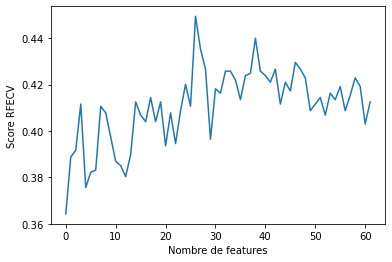

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel("Nombre de features")
plt.ylabel("Score RFECV")
plt.plot(rfecv.grid_scores_);
plt.show()
# L'attribut n_features est un entier qui représente le nombre de features conservées par l'algorithme.
# L'attribut grid_scores_ contient les scores moyens en cross validation de l'estimateur pour les itérations successives.

## 1.2 Regression Logistique avec Elasticnet

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score

# Regression logistique via leasticnet pour selection des variables importantes
parametres = {'C':[0.1,1,3,5],'l1_ratio': [0.1, 0.25, 0.8, 0.99]}
clf = linear_model.LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 2000)
# On utilise un max_iter important pour assurer la convergence
grid_clf = GridSearchCV(estimator=clf, param_grid=parametres)

In [13]:
grille = grid_clf.fit(X_train,y_train)
print(grid_clf.best_params_) # Selection du meilleur parameter

{'C': 0.1, 'l1_ratio': 0.99}


In [14]:
# QUID selection des variables via elasticnet ?
# ligne a tracer (on a 3 lignes car 3 classes)
optimal_clf = grid_clf.best_estimator_
elast_coef = optimal_clf.coef_

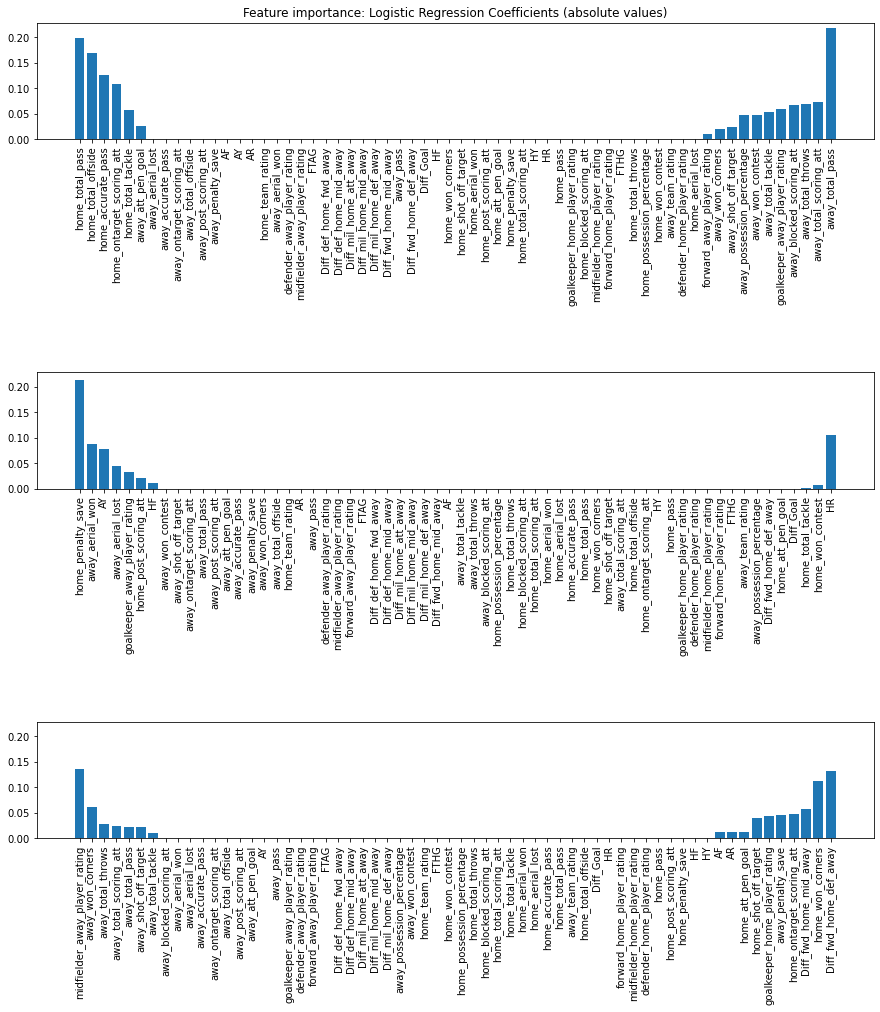

In [15]:
# On affiche pour les 3 regressions faites (3 classes pour la variable cible), les features par importances. 
# Les features a supprimer sont ceux dont le coefficient est nul
ticks = np.arange(0, len(elast_coef[0,:]))
fig, [ax1, ax2, ax3] = plt.subplots(3,1,figsize=(15,15), sharex = False, sharey = True)
ax1.bar(ticks, np.abs(elast_coef[0,elast_coef[0,:].argsort()]))
ax1.set_xticks(ticks)
ax1.set_xticklabels(X_train.columns.values[elast_coef[0,:].argsort()], rotation='vertical')

ax2.bar(ticks, np.abs(elast_coef[1,elast_coef[1,:].argsort()]))
ax2.set_xticks(ticks)
ax2.set_xticklabels(X_train.columns.values[elast_coef[1,:].argsort()], rotation='vertical')

ax3.bar(ticks, np.abs(elast_coef[2,elast_coef[2,:].argsort()]))
ax3.set_xticks(ticks)
ax3.set_xticklabels(X_train.columns.values[elast_coef[2,:].argsort()], rotation='vertical')
ax1.set_title("Feature importance: Logistic Regression Coefficients (absolute values)")
plt.subplots_adjust(hspace= 2)
plt.show()

## 1.3 PCA

In [16]:
from sklearn.decomposition import PCA
# On cherche dans un premier temps le nombre obtimal de vecteur pour representer notre dataset
data = df[feats_list]
pca = PCA(n_components = 6)
pca.fit(data)

PCA(n_components=6)

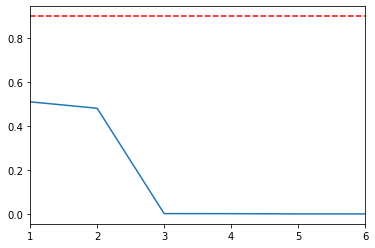

In [17]:
plt.figure()
plt.xlim(1,6)
plt.plot(np.array(range(1,7)),pca.explained_variance_ratio_);
plt.axhline(y = 0.9, color ='r', linestyle = '--')

In [18]:
pca = PCA(n_components = 0.9)
pca.fit(data)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 2


No handles with labels found to put in legend.


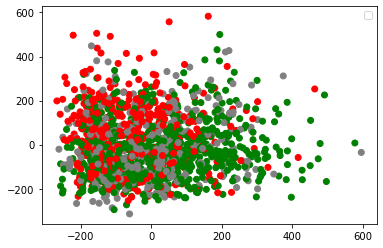

No handles with labels found to put in legend.


La part de variance expliquée est 0.99


In [19]:
# Puisque le nombre retenu est de 2 alors on va faire un plot pour visualiser les données dans l'espace de projection en 2D
# PCA 2D avec plot en colorisant via labels:
pca_2D = PCA(n_components = 2)
data_2D_pca = pca_2D.fit_transform(data)
target = df[target_list].values

plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
colors = {'A':'red', 'D':'gray', 'H':'green'}
ax.scatter(data_2D_pca[:, 0], data_2D_pca[:, 1], c = df[target_list].map(colors))
plt.legend()
plt.show()
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title("Données projetées sur les 2 axes de PCA")
ax.legend(loc='best')
plt.show();
print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

## 1.4 LDA

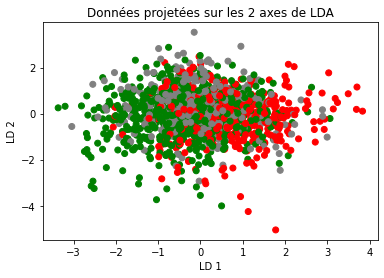

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
target = df[target_list].values
data_2D_lda = lda.fit_transform(data, target)

plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
colors = {'A':'red', 'D':'gray', 'H':'green'}
ax.scatter(data_2D_lda[:, 0], data_2D_lda[:, 1], c = df[target_list].map(colors))
ax.set_xlabel('LD 1')
ax.set_ylabel('LD 2')
 
ax.set_title("Données projetées sur les 2 axes de LDA")
plt.show();


In [21]:
# Il reste difficile pour un algorithme LDA de séparer les variables en fonction de leur label et 
# d'identifier dans l'espace des zones où l'on a plus de chances de rencontrer un label. 

## 1.5 Manifold - tNSE

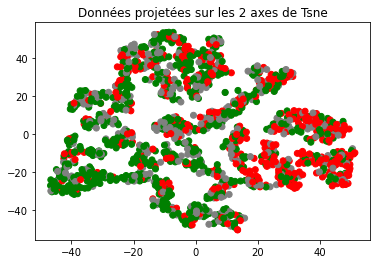

In [22]:
from sklearn.manifold import Isomap, TSNE

tsne = TSNE(n_components=2, method = 'barnes_hut')
dataTSNE = tsne.fit_transform(data)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataTSNE[:, 0], dataTSNE[:, 1],  c = df[target_list].map(colors))
ax.set_title("Données projetées sur les 2 axes de Tsne")
plt.show();

## 1.6 Manifold - IsoMap

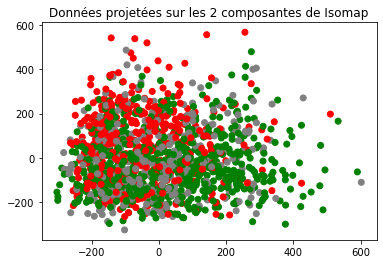

In [23]:
isomap = Isomap(n_neighbors=50, n_components=2)
dataISO = isomap.fit_transform(data)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataISO[:, 0], dataISO[:, 1],  c =df[target_list].map(colors))
ax.set_title("Données projetées sur les 2 composantes de Isomap")
plt.show();


In [24]:
# Il ne semble pas y avoir d'apport particulier pour ce type # de problème en utilisant des méthodes LDA ou Manifold 
# (pas de séparation des groupes de labels par exemple pour la visualisation)

In [25]:
# Dataset _NR
X_train_NR = X_train
X_test_NR = X_test

In [26]:
# Dataset _FS

# Nombre de colonnes ayant un coefficient de la regression nul (pour chaqque colonne de la matrice de coefficients d'influence)
print(np.size(np.where(optimal_clf.coef_[0,:]==0)))
print(np.size(np.where(optimal_clf.coef_[1,:]==0)))
print(np.size(np.where(optimal_clf.coef_[2,:]==0)))

45
51
45


In [27]:
# Colonnes en communs:
del_col_0 = set(X_train.columns.values[np.where(optimal_clf.coef_[0,:]==0)])
del_col_1 = set(X_train.columns.values[np.where(optimal_clf.coef_[1,:]==0)])
del_col_2 = set(X_train.columns.values[np.where(optimal_clf.coef_[2,:]==0)])

print('Nombre de colonnes à supprimer:',len(del_col_0.intersection(del_col_1, del_col_2)),'\n')
print('Variables à supprimer:')
print(del_col_0.intersection(del_col_1, del_col_2))

Nombre de colonnes à supprimer: 27 

Variables à supprimer:
{'home_blocked_scoring_att', 'away_post_scoring_att', 'away_team_rating', 'away_pass', 'home_aerial_lost', 'home_possession_percentage', 'forward_home_player_rating', 'away_ontarget_scoring_att', 'home_aerial_won', 'Diff_def_home_mid_away', 'home_total_throws', 'Diff_mil_home_att_away', 'Diff_mil_home_def_away', 'midfielder_home_player_rating', 'defender_home_player_rating', 'Diff_mil_home_mid_away', 'FTHG', 'HY', 'home_total_scoring_att', 'away_accurate_pass', 'home_pass', 'away_total_offside', 'Diff_Goal', 'home_team_rating', 'defender_away_player_rating', 'FTAG', 'Diff_def_home_fwd_away'}


In [28]:
# Suppression des colonnes ayant peu d'impact et standardisation pour la suite
to_drop = list(del_col_0.intersection(del_col_1, del_col_2))
X_train_FS = X_train.drop(to_drop, axis=1)
X_test_FS  = X_test.drop(to_drop, axis=1)

In [29]:
# Dataset _R
X_train_R = pca.fit_transform(X_train)
X_test_R = pca.transform(X_test)

# 2 - Modèles de classification

## 2.1 Régression Logistique

In [30]:
# Les parametres précedemment trouvés sont: {'C': 0.1, 'l1_ratio': 0.99}
from sklearn.metrics import classification_report 

clf_NR = linear_model.LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 2000, C =0.1, l1_ratio= 0.99)
clf_FS = linear_model.LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 2000, C =0.1, l1_ratio= 0.99)
clf_R  = linear_model.LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 2000, C =0.1, l1_ratio= 0.99)

clf_NR.fit(X_train_NR,y_train)
clf_FS.fit(X_train_FS,y_train)
clf_R.fit(X_train_R,y_train)

y_pred_cfl_NR = clf_NR.predict(X_test_NR)
y_pred_cfl_FS = clf_FS.predict(X_test_FS)
y_pred_cfl_R  = clf_R.predict(X_test_R)

In [33]:
# Evaluation du model: Classification report / Les trois modèles sont comparables
print('Dataset non réduit (NR):')
print(classification_report(y_test, pd.DataFrame(y_pred_cfl_NR)))
print('Dataset avec séléction des features (FS):')
print(classification_report(y_test, pd.DataFrame(y_pred_cfl_FS)))
print('Dataset réduit (R):')
print(classification_report(y_test, pd.DataFrame(y_pred_cfl_R)))

Dataset non réduit (NR):
              precision    recall  f1-score   support

           A       0.50      0.48      0.49       106
           D       0.00      0.00      0.00        95
           H       0.52      0.82      0.64       167

    accuracy                           0.51       368
   macro avg       0.34      0.43      0.37       368
weighted avg       0.38      0.51      0.43       368

Dataset avec séléction des features (FS):
              precision    recall  f1-score   support

           A       0.50      0.48      0.49       106
           D       0.00      0.00      0.00        95
           H       0.52      0.82      0.64       167

    accuracy                           0.51       368
   macro avg       0.34      0.43      0.37       368
weighted avg       0.38      0.51      0.43       368

Dataset réduit (R):
              precision    recall  f1-score   support

           A       0.47      0.46      0.47       106
           D       0.00      0.00      0.0

In [36]:
# Evaluation du model: Matrice de Confusion
print('Dataset non réduit (NR):')
pd.crosstab(y_test, pd.Series(y_pred_cfl_NR), rownames=['Classe réelle'], colnames=['Classe prédite'])

Dataset non réduit (NR):


Classe prédite,A,D,H
Classe réelle,,,
A,51,0,55
D,23,0,72
H,29,1,137


In [37]:
print('Dataset avec séléction des features (FS):')
pd.crosstab(y_test, pd.Series(y_pred_cfl_FS), rownames=['Classe réelle'], colnames=['Classe prédite'])

Dataset avec séléction des features (FS):


Classe prédite,A,D,H
Classe réelle,,,
A,51,0,55
D,23,0,72
H,29,1,137


In [38]:
print('Dataset réduit (R):')
pd.crosstab(y_test, pd.Series(y_pred_cfl_R), rownames=['Classe réelle'], colnames=['Classe prédite'])
# Pas de predictions de matchs nuls détectés

Dataset réduit (R):


Classe prédite,A,D,H
Classe réelle,,,
A,49,1,56
D,24,0,71
H,31,2,134


## 2.2 K plus proches Voisins

In [ ]:
# Etude méthode KNN:
from sklearn import neighbors

parametres = {'n_neighbors': [1, 5, 10, 15], 'metric': ['manhattan', 'chebyshev', 'minkowski', 'l1' , 'l2'] }
knn = neighbors.KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn, param_grid=parametres)
grille = grid_knn.fit(X_train,y_train)
print(grid_knn.best_params_) 
# Selection du meilleur parameter: Le max du nombre de voisin est toujours séléctionné

In [ ]:
optimal_knn = grid_knn.best_estimator_
y_pred_knn = optimal_knn.predict(X_test)
pd.crosstab(y_test, y_pred_knn, rownames=['Classe réelle'], colnames=['Classe prédite']) # Affichage matrice de confusion PLUSIEURS CLASSES POSSIBLES à classifier avec KNN
# On ne prédit aucun match nul

In [ ]:
print(classification_report(y_test, pd.DataFrame(y_pred_knn)))

## 2.3 SVM

In [ ]:
from sklearn import svm
from sklearn import model_selection

clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
parametres = {'C':[0.1,1,3,5], 'kernel':['rbf','linear'], 'gamma':[0.001, 0.005, 0.01, 0.1]}# Cross validation

grid_clf_svm = model_selection.GridSearchCV(estimator=clf_svm, param_grid=parametres)
grille = grid_clf_svm.fit(X_train,y_train)
print(grid_clf_svm.best_params_) # Affichage du meilleur parameter qui a été selectionné par default (fit)

In [ ]:
#Prédiction des features test et création de la matrice de confusion
y_pred_svm = grid_clf_svm.predict(X_test)
pd.crosstab(y_test, y_pred_svm, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(classification_report(y_test, pd.DataFrame(y_pred_svm)))

## 2.4 Decision Tree and Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

parametres = {'max_depth': [1, 2, 3, 5, 7]}
dtc = DecisionTreeClassifier() #Arbres de decision
grid_dtc = GridSearchCV(estimator=dtc, param_grid=parametres)
grille = grid_dtc.fit(X_train,y_train)

print("Score:", grid_dtc.score(X_test, y_test)) #Evaluation du modele 
print("Best Param:",grid_dtc.best_params_)

In [ ]:
y_pred_dtc = grid_dtc.predict(X_test)
pd.crosstab(y_test, y_pred_dtc, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(classification_report(y_test, pd.DataFrame(y_pred_dtc)))

In [ ]:
ac = AdaBoostClassifier(base_estimator=dtc, n_estimators=400) #BOOSTING
ac.fit(X_train, y_train)
y_pred_boost = ac.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred_boost, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(classification_report(y_test, pd.DataFrame(y_pred_boost)))

##  2.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
parametres = {'max_depth': [3, 5, 7, 10],'n_estimators': [10, 30, 50, 100] }

grid_forest = GridSearchCV(estimator=forest, param_grid=parametres)
grille = grid_forest.fit(X_train,y_train)
print("Best Param:",grid_forest.best_params_)

In [ ]:
# On declare un nouveau model pour avoir acces à la variable "feature_importance" (indisponible via GridSearchCV)
best_forest = RandomForestClassifier(random_state=0, max_depth = 7, n_estimators = 50)
best_forest.fit(X_train, y_train)
y_pred_forest = best_forest.predict(X_test)
pd.crosstab(y_test, y_pred_forest, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(classification_report(y_test, pd.DataFrame(y_pred_forest)))

In [ ]:
# On affiche l'importance des variables dans la classification (variable feature_importance et sa std sur 
# tous les arbres considerés de notre meilleur modele séléctionné)
importances = best_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns.values)
forest_importances = forest_importances[forest_importances.argsort().values]

fig, ax = plt.subplots(figsize=(15,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_xticklabels(forest_importances.index, rotation='vertical')
ax.set_title("Feature importances")
fig.tight_layout()
plt.show()
# Les variables crées avec le prefixe "Diff" paraissent pertinentes

##  2.6 XG Boost

In [ ]:
# MATRICES
train = xgb.DMatrix(data=X_train, label=y_train)
test = xgb.DMatrix(data=X_test, label=y_test)

# Ici on ne considere pas d'echantillon de Validation. A voir si necessaire de splitter Train
xgb_ini = xgb.XGBClassifier(objective='multi:softprob')
xgb_ini.train()

In [ ]:
param_CV = {
    'max_depth': range(2, 7, 1),
    'num_boost_round': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_xgb = GridSearchCV(
        estimator=xgb_ini,
        param_grid=param_CV,
        scoring = 'f1',
        cv = 4,
)
grid_xgb.fit(train)

In [ ]:
# Performances:
preds = grid_xgb.predict(test)

xgbpreds = pd.Series(np.where(preds > 0.5, 1, 0))
pd.crosstab(xgbpreds, pd.Series(y_test))

In [ ]:
# On mesure l'importance des features via l'option 'Gain': 
# C'est la réduction moyenne de la fonction de perte obtenue lors de l'utilisation d'une feature pour séparer une branche.
xgb.plot_importance(grid_xgb, max_num_features=15, importance_type='gain');

##  2.7 Voting Classifier

In [ ]:
# On considere un Voting Classifier avec un vote 'soft' en supposant que les modèles sont correctement calibrés. 
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import f1_score
 
# Création de Voting classifier
vclf = VotingClassifier(estimators=[('cfl', optimal_clf), ('knn', optimal_knn), ('svm', grid_clf_svm), ('dtc', grid_dtc), ('forest', grid_forest), ('XGB', grid_xgb)], voting='soft')
cv3 = KFold(n_splits=3, random_state=111, shuffle=True)
 
# Affiche moyenne – ecart type pour chacun des Classifiers, y compris le voting classifier !
for clf, label in zip([optimal_clf, optimal_knn, grid_clf_svm, grid_dtc, grid_forest, grid_xgb], ['cfl', 'knn', 'svm', 'dtc', 'forest', 'XGB']):
    scores = cross_validate(clf, X_train, y_train, cv=cv3, scoring=['accuracy','f1'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1'].mean(), scores['test_f1'].std()))

In [ ]:
# Performances:
vclf.fit(X_train, y_train)
y_pred_vcfl = vclf.predict(X_test)
pd.crosstab(y_test, y_pred_vcfl, rownames=['Classe réelle'], colnames=['Classe prédite'])

# 3 Comparaisons